In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, pipeline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [9]:
trainingdata = pd.read_csv("trainingtable.csv", header=0, index_col=0)
trainingdata.head()

,X5720,X466,X6009,X2309,X387,X3553,X427,X5898,X23365,X6657,...,X9738,X6793,X7358,X58472,X50865,X23200,X51293,X10962,X10153,X874
sample_id,,,,,,,,,,,,,,,,,,,,,
BRD-A07106394:QIVBCDIJIAJPQS-UHFFFAOYSA-N:20 µM:24 h:HA1E_HA1E,0.572005,-0.215412,0.173019,0.489742,0.420306,-0.339560,-0.052438,-0.278286,0.062474,-0.595485,...,0.214504,-1.008332,-0.932064,0.196377,0.388575,-0.675791,0.237582,0.077460,0.445300,0.430141
BRD-A17655518:HEFNNWSXXWATRW-UHFFFAOYSA-N:10 µM:24 h:A375_A549_HA1E_HT29_MCF7_PC3_VCAP_MCF7_PC3_VCAP,0.156599,-0.205048,0.022631,0.266661,-0.024832,0.242809,-0.038130,-0.007111,0.194066,-0.002117,...,0.722045,0.302664,-0.190207,-0.063637,-0.233029,-0.346681,0.019575,0.062390,0.088810,0.232947
BRD-A17846016:GLEVLJDDWXEYCO-UHFFFAOYSA-N:10 µM:24 h:MCF7_PC3,0.144802,-1.361585,0.274811,0.320524,0.294310,0.437889,-0.410621,-1.944621,1.114904,0.391805,...,-0.814418,0.090174,-1.075967,0.063934,-0.699627,0.559719,0.558929,-0.233413,0.507622,0.170530
BRD-A19037878:RTKIYFITIVXBLE-WKWSCTOISA-N:1.11 µM:24 h:A375_A549_HA1E_HCC515_HEPG2_HT29_MCF7_PC3,0.571052,-2.094509,-1.362594,1.188793,0.796376,0.523494,0.119419,1.646214,1.405747,1.342340,...,1.620770,1.148686,-4.769783,-0.598601,2.829943,2.217611,-0.849854,-1.417561,2.965447,-3.550254
BRD-A35258977:FBPFZTCFMRRESA-UHFFFAOYSA-N:20 µM:24 h:HA1E_HA1E,0.519844,0.279864,-0.065269,-0.025814,0.543482,0.184110,0.275908,0.320203,-0.121650,-0.446459,...,0.196816,0.605350,-0.261210,0.428848,0.486934,0.002326,0.151491,0.228473,-0.580365,0.917084


In [10]:
X = trainingdata
y = np.append(np.repeat(1, 96), np.repeat(0, 96))

In [ ]:
# this will take some time!!!
X.plot.hist()

In [31]:
X.shape

(192, 978)

# Quick and dirty solution
(short and sweet)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [42]:
model = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [51]:
predictions = model.predict(X_test)
predictions_probas = model.predict_proba(X_test)
probas = []
for i in range(len(predictions_probas)):
    probas.append(predictions_probas[i][1])

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)
metrics.plot_precision_recall_curve(model, X_test, y_test)

## Grid optimization for SGDClassifier

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [35]:
clf = SGDClassifier(random_state = 0, penalty="elasticnet")
#classifier.get_params().keys()

In [36]:
classifier = pipeline.Pipeline(steps=[
    ("scaling", preprocessing.StandardScaler()),
    ("classifier", clf)
])

In [122]:
classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaling', 'classifying', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'classifying__alpha', 'classifying__average', 'classifying__class_weight', 'classifying__early_stopping', 'classifying__epsilon', 'classifying__eta0', 'classifying__fit_intercept', 'classifying__l1_ratio', 'classifying__learning_rate', 'classifying__loss', 'classifying__max_iter', 'classifying__n_iter_no_change', 'classifying__n_jobs', 'classifying__penalty', 'classifying__power_t', 'classifying__random_state', 'classifying__shuffle', 'classifying__tol', 'classifying__validation_fraction', 'classifying__verbose', 'classifying__warm_start'])

In [37]:
paramgrid = {
    "classifier__loss" : ["squared_hinge", "hinge", "log", "modified_huber"],
    "classifier__alpha" : np.logspace(-6, 0, 5),
    "classifier__l1_ratio" : np.linspace(0.0001, 1, 5)
}

In [38]:
#cv_strategy = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
scorer = metrics.make_scorer(metrics.roc_auc_score, needs_threshold = True)

In [39]:
grid_cv = model_selection.GridSearchCV(classifier, paramgrid, scoring = scorer, cv = cv_strategy)

In [40]:
grid_cv.fit(X_train, y_train)

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\sklearn\line

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('classifier',
                                        SGDClassifier(penalty='elasticnet',
                                                      random_state=0))]),
             param_grid={'classifier__alpha': array([1.00000000e-06, 3.16227766e-05, 1.00000000e-03, 3.16227766e-02,
       1.00000000e+00]),
                         'classifier__l1_ratio': array([1.00000e-04, 2.50075e-01, 5.00050e-01, 7.50025e-01, 1.00000e+00]),
                         'classifier__loss': ['squared_hinge', 'hinge', 'log',
                                              'modified_huber']},
             scoring=make_scorer(roc_auc_score, needs_threshold=True))

In [140]:
grid_cv.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier',
                 SGDClassifier(alpha=0.21544346900318823, l1_ratio=0.5556,
                               penalty='elasticnet', random_state=0))])

In [41]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.6164835164835165
{'classifier__alpha': 0.03162277660168379, 'classifier__l1_ratio': 0.250075, 'classifier__loss': 'hinge'}


In [ ]:
pd.DataFrame(grid_cv.cv_results_)

In [42]:
res = pd.DataFrame(grid_cv.cv_results_)
res.groupby("param_classifier__loss").mean("mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_classifier__loss,,,,,,,,,,,,,,,,,
hinge,0.051943,0.007280,0.018741,0.005244,0.563516,0.577582,0.620659,0.594945,0.487253,0.665055,0.585275,0.525055,0.605055,0.486593,0.571099,0.069868,42.00
log,0.053685,0.007228,0.017585,0.003304,0.528571,0.587033,0.606374,0.600659,0.546593,0.650330,0.544835,0.521099,0.569451,0.504615,0.565956,0.060798,48.40
modified_huber,0.052856,0.010846,0.018152,0.004389,0.530989,0.586154,0.634945,0.608352,0.539560,0.653846,0.553846,0.527253,0.560000,0.497143,0.569209,0.066931,50.24
squared_hinge,0.074144,0.025707,0.024648,0.023363,0.564176,0.614725,0.610769,0.612747,0.479780,0.665714,0.574945,0.527033,0.583516,0.480440,0.571385,0.069866,58.08


In [45]:
res.to_csv("test.csv", sep="\t")

Plot optimization heatmap:

In [44]:
import plotly.graph_objects as go
from plotly.offline import plot


forplot = res.loc[res["param_classifier__loss"] == "hinge"]
z = forplot.pivot_table(columns="param_classifier__alpha", index = "param_classifier__l1_ratio", values = "mean_test_score")

fig = go.Figure(data=go.Heatmap(
    y = np.sort(np.unique(forplot["param_classifier__l1_ratio"])),
    x = np.sort(np.unique(forplot["param_classifier__alpha"])),
    z = z,
    type = "heatmap",
    colorscale = "Viridis"))
fig.update_layout(xaxis_type="log", yaxis_type="linear",
                 xaxis = dict(
                 title="alpha"),
                 yaxis = dict(
                 title="l1_ratio"))
fig.write_image("plots/opt_SGD_hinge_3.pdf")
#plot(fig)

In [105]:
z.head()

param_l1_ratio


Assess whether the "best" parameter set is actually robust:

In [111]:
bestparams = grid_cv.best_params_
scorer = metrics.make_scorer(metrics.roc_auc_score)
classifier = SGDClassifier(random_state = 0, penalty="elasticnet", **bestparams)
scores = []

for i in range(0, 51):
    cv_strategy = model_selection.StratifiedShuffleSplit(n_splits = 10, test_size=0.2, random_state = i)
    scoring = model_selection.cross_val_score(classifier, X_train, y_train, scoring = scorer, cv = cv_strategy)
    scores.append(scoring.mean())

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

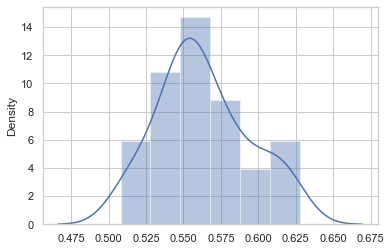

In [112]:
sns.distplot(scores)

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



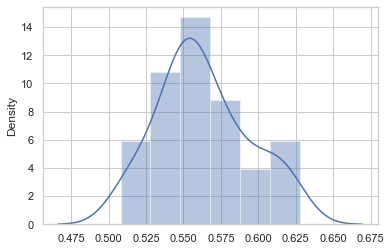

In [113]:

plot = sns.distplot(scores)
fig = plot.get_figure()
fig.savefig("plots/dist_rocauc_shufflesplit2.png", dpi=600)


D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

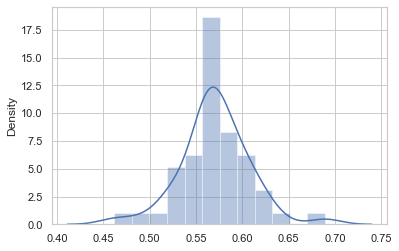

In [59]:
temp = res.loc[res["param_loss"] == "squared_hinge"].sort_values(axis=0, by="mean_test_score", ascending=False, ignore_index=True)
secondbestparams = {
    "loss": "squared_hinge",
    "alpha": temp.loc[1, "param_alpha"],
    "l1_ratio": temp.loc[1, "param_l1_ratio"]
}
scorer = metrics.make_scorer(metrics.roc_auc_score)
classifier = SGDClassifier(random_state = 0, penalty="elasticnet", **secondbestparams)
scores = []

for i in range(0, 51):
    cv_strategy = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = i)
    scoring = model_selection.cross_val_score(classifier, X_train, y_train, scoring = scorer, cv = cv_strategy)
    scores.append(scoring.mean())
    
sns.distplot(scores)

ShuffleSplit proved to be better than KFold crossvalidation, so I'm gonna keep it. Linear models proved to perform poorly on my data.

## Introducing polynomial features

In [20]:
clf = SGDClassifier(random_state = 0, penalty="elasticnet")

classifier = pipeline.Pipeline(steps=[
    ("scaling", preprocessing.StandardScaler()),
    ("polynomial", preprocessing.PolynomialFeatures(3)),
    ("classifier", clf)
])

paramgrid = {
    "classifier__loss" : ["squared_hinge", "hinge", "log", "modified_huber"],
    #"classifier__loss" : ["squared_hinge"],
    "classifier__alpha" : np.logspace(-6, 0, 5),
    "classifier__l1_ratio" : np.linspace(0.0001, 1, 5)
}

#cv_strategy = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
scorer = metrics.make_scorer(metrics.roc_auc_score, needs_threshold=True)
grid_cv = model_selection.RandomizedSearchCV(classifier, paramgrid, scoring = scorer, cv = cv_strategy, n_iter=10)
grid_cv.fit(X_train, y_train)

C:\Users\LabSysBio\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: 

In [6]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.6596153846153846
{'classifier__alpha': 1e-06, 'classifier__l1_ratio': 0.0001, 'classifier__loss': 'hinge'}


In [7]:
res = pd.DataFrame(grid_cv.cv_results_)
res.groupby("param_classifier__loss").mean("mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_classifier__loss,,,,,,,,,,,,,,,,,
hinge,31.161342,26.044088,0.120234,0.008467,0.614725,0.644286,0.594176,0.657912,0.652527,0.575604,0.628132,0.613626,0.599011,0.643407,0.622341,0.043633,39.84
log,31.611442,31.821830,0.119774,0.007183,0.650110,0.635714,0.600549,0.653407,0.575934,0.548462,0.630549,0.599560,0.640989,0.652308,0.618758,0.048274,44.96
modified_huber,44.335278,36.868865,0.119612,0.008415,0.657363,0.643736,0.584725,0.680440,0.578901,0.561319,0.635275,0.624396,0.641978,0.642198,0.625033,0.055518,43.16
squared_hinge,43.497859,40.284817,0.121623,0.010792,0.672198,0.668791,0.530330,0.636374,0.581648,0.549560,0.647692,0.635934,0.612418,0.666264,0.620121,0.058616,67.72


In [64]:
res = pd.read_csv("opt_poly2_2.csv", sep="\t")

temp = res.sort_values(axis=0, by="mean_test_score", ascending=False, ignore_index=True)
bestparams = {
    "loss": temp.loc[0, "param_classifier__loss"],
    "alpha": temp.loc[0, "param_classifier__alpha"],
    "l1_ratio": temp.loc[0, "param_classifier__l1_ratio"]
}
bestparams

{'loss': 'log', 'alpha': 0.031622776601683784, 'l1_ratio': 1e-06}

In [49]:
res.groupby("param_classifier__loss").mean("mean_test_score")

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,param_classifier__l1_ratio,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_classifier__loss,,,,,,,,,,,,,,,,,,,,
hinge,49.0,107.804565,100.226841,1.132702,0.243089,0.206531,0.50005,0.609890,0.705055,0.628571,0.688791,0.570110,0.601099,0.667692,0.607912,0.630549,0.722198,0.643187,0.062984,56.32
log,50.0,96.745536,106.241133,1.123844,0.230225,0.206531,0.50005,0.629231,0.702198,0.686813,0.684615,0.550549,0.590330,0.650330,0.605934,0.726154,0.740000,0.656615,0.071795,33.72
modified_huber,51.0,131.234578,96.510271,1.094258,0.243310,0.206531,0.50005,0.638242,0.716264,0.660000,0.721758,0.551429,0.603736,0.669011,0.642637,0.726154,0.731868,0.666110,0.080055,34.04
squared_hinge,48.0,117.377572,103.048019,1.136656,0.241179,0.206531,0.50005,0.672308,0.725055,0.602637,0.672088,0.551429,0.586154,0.700659,0.641978,0.639560,0.708571,0.650044,0.060810,72.68


In [66]:
import plotly.graph_objects as go
from plotly.offline import plot


forplot = res.loc[res["param_classifier__loss"] == "log"]
z = forplot.pivot_table(columns="param_classifier__alpha", index = "param_classifier__l1_ratio", values = "mean_test_score")

fig = go.Figure(data=go.Heatmap(
    y = np.sort(np.unique(forplot["param_classifier__l1_ratio"])),
    x = np.sort(np.unique(forplot["param_classifier__alpha"])),
    z = z,
    type = "heatmap",
    colorscale = "Viridis"))
fig.update_layout(xaxis_type="log", yaxis_type="linear",
                 xaxis = dict(
                 title="alpha"),
                 yaxis = dict(
                 title="l1_ratio"))
fig.write_image("plots/opt_SGD_poly2_log_3.pdf")
#plot(fig)

Testing on the test set:

D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

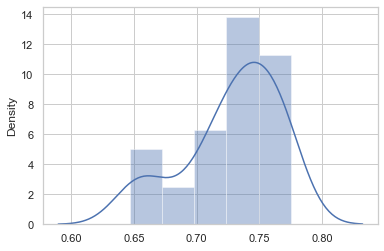

In [68]:
scr = metrics.make_scorer(metrics.roc_auc_score, needs_threshold=True)

scores = []
accuracy = []
precision = []
recall = []

for i in range(0, 31):
    clf = SGDClassifier(random_state = i, penalty="elasticnet", alpha=3.162e-5, l1_ratio=0.0001, loss="log")
    
    classifier = pipeline.Pipeline(steps=[
        ("scaling", preprocessing.StandardScaler()),
        ("polynomial", preprocessing.PolynomialFeatures(2)),
        ("classifier", clf)
    ])

    classifier.fit(X_train, y_train)

    scores.append(scr(classifier, X_test, y_test))
    
    predictions = classifier.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test, predictions))
    precision.append(metrics.precision_score(y_test, predictions))
    recall.append(metrics.recall_score(y_test, predictions))

sns.distplot(scores)
#etrics.plot_roc_curve(classifier, X_test, y_test)
#metrics.plot_precision_recall_curve(classifier, X_test, y_test)

In [70]:
print("Median accuracy:", np.median(accuracy))
print("Median precision:", np.median(precision))
print("Median recall:", np.median(recall))

Median accuracy: 0.6379310344827587
Median precision: 0.6153846153846154
Median recall: 0.7931034482758621


D:\Programs\Science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



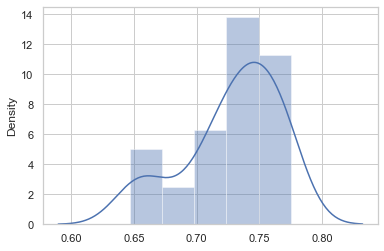

In [62]:
plot = sns.distplot(scores)
fig = plot.get_figure()
fig.savefig("plots/dist_rocauc_poly2_test.png", dpi=600)

In [63]:
np.median(scores)

0.7395957193816884

0.7740784780023781
0.7740784780023781
0.6551724137931034


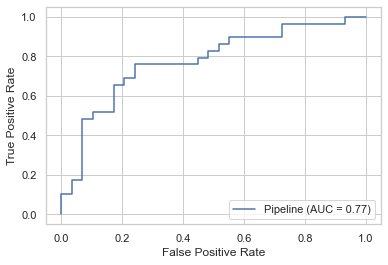

In [32]:
clf = SGDClassifier(random_state = 2, penalty="elasticnet", alpha=1e-6, l1_ratio=0.0001, loss="hinge")
classifier = pipeline.Pipeline(steps=[
        ("scaling", preprocessing.StandardScaler()),
        ("polynomial", preprocessing.PolynomialFeatures(2)),
        ("classifier", clf)
    ])

classifier.fit(X_train, y_train)
               
prediction = classifier.decision_function(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = prediction)

auc = metrics.auc(fpr, tpr)

print(auc)

scr = metrics.make_scorer(metrics.roc_auc_score, needs_threshold=True)

print(scr(classifier, X_test, y_test))

print(scorer(classifier, X_test, y_test))

metrics.plot_roc_curve(classifier, X_test, y_test)

In [33]:
metrics.roc_auc_score(y_true = y_test, y_score = classifier.decision_function(X_test))

0.7740784780023781

## Random Forest

In [15]:
clf = RandomForestClassifier(random_state = 0)


paramgrid = {
    "n_estimators" : np.arange(10, 205, 5),
    "max_depth" : np.arange(2, 5),
    "criterion" : ["gini", "entropy"],
    "max_features": np.arange(5, 50, 5)
}

#cv_strategy = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
scorer = metrics.make_scorer(metrics.roc_auc_score, needs_threshold=True)
grid_cv = model_selection.GridSearchCV(clf, paramgrid, scoring = scorer, cv = cv_strategy, n_jobs=-1, verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 2106 candidates, totalling 21060 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 2672 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 3866 tasks      | elapsed:  1.4min


KeyboardInterrupt: 

In [6]:
np.arange(5, 50, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])

## Legacy code

In [5]:
classifier = LogisticRegression(random_state = 1)
cv_strategy = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
scorer = metrics.make_scorer(metrics.roc_auc_score)

In [12]:
scoring = model_selection.cross_val_score(classifier, X, y, scoring = scorer, cv = cv_strategy)

In [13]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(scoring.mean(), scoring.max(), 
                                                   scoring.min(), scoring.std()))

Log mean:0.6261111111111111, max:0.7944444444444444, min:0.4611111111111111, std:0.08770214744615246


In [52]:
trainingdata["class"] = np.append(np.repeat(1, 96), np.repeat(0, 96))

In [31]:
trainingdata.iloc[:, 1:979].head()

,X5720,X466,X6009,X2309,X387,X3553,X427,X5898,X23365,X6657,...,X9738,X6793,X7358,X58472,X50865,X23200,X51293,X10962,X10153,X874
0,0.572005,-0.215412,0.173019,0.489742,0.420306,-0.339560,-0.052438,-0.278286,0.062474,-0.595485,...,0.214504,-1.008332,-0.932064,0.196377,0.388575,-0.675791,0.237582,0.077460,0.445300,0.430141
1,0.156599,-0.205048,0.022631,0.266661,-0.024832,0.242809,-0.038130,-0.007111,0.194066,-0.002117,...,0.722045,0.302664,-0.190207,-0.063637,-0.233029,-0.346681,0.019575,0.062390,0.088810,0.232947
2,0.144802,-1.361585,0.274811,0.320524,0.294310,0.437889,-0.410621,-1.944621,1.114904,0.391805,...,-0.814418,0.090174,-1.075967,0.063934,-0.699627,0.559719,0.558929,-0.233413,0.507622,0.170530
3,0.571052,-2.094509,-1.362594,1.188793,0.796376,0.523494,0.119419,1.646214,1.405747,1.342340,...,1.620770,1.148686,-4.769783,-0.598601,2.829943,2.217611,-0.849854,-1.417561,2.965447,-3.550254
4,0.519844,0.279864,-0.065269,-0.025814,0.543482,0.184110,0.275908,0.320203,-0.121650,-0.446459,...,0.196816,0.605350,-0.261210,0.428848,0.486934,0.002326,0.151491,0.228473,-0.580365,0.917084


In [82]:
import statsmodels.api as sm

#np.where(trainingdata.std(axis = 1) < 0.25)

#trainingdata = trainingdata.iloc[:, trainingdata.columns.difference(np.where(trainingdata.std(axis = 1) < 0.25)[0])]

X = trainingdata.iloc[:, 2:960]
y = trainingdata["class"]
logit_model=sm.Logit(y,X)
result=logit_model.fit()



print(result.summary2())

PerfectSeparationError: Perfect separation detected, results not available

In [57]:
#pd.set_option("display.max_rows", 10, "display.max_columns", 10)
positivedata = trainingdata[trainingdata["class"] == 1]
negativedata = trainingdata[trainingdata["class"] == 0]

In [69]:
positive = positivedata.drop(columns = ['class', 'sample_id']).transpose()
negative = negativedata.drop(columns = ['class', 'sample_id']).transpose()

In [70]:
positive["max"] = positive.max(axis = 1)
positive["min"] = positive.min(axis = 1)
negative["max"] = negative.max(axis = 1)
negative["min"] = negative.min(axis = 1)


In [73]:
badgenes = trainingdata.columns[1:979][positive["min"] > negative["max"] | positive["max"] < negative["min"]]
badgenes

TypeError: unsupported operand type(s) for |: 'float' and 'float'

In [75]:
(positive["min"] > negative["max"]).sum()


0

In [78]:
(positive["max"] < negative["min"]).sum()

0

In [33]:
np.where(trainingdata.std(axis = 1) < 0.25)[0]

array([  8,  49,  76,  89,  99, 150, 168, 190], dtype=int64)

In [37]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#trainingdata.loc[:, (trainingdata == 0).sum() > 50]
#trainingdata.iloc[:, np.where(trainingdata.std(axis = 1) < 0.25)[0]]
trainingdata = trainingdata.loc[:, trainingdata.columns.difference(np.where(trainingdata.std(axis = 1) < 0.25)[0])]

#trainingdata.loc[:, (trainingdata == 0).any(axis = 0)]

In [39]:
trainingdata.shape

(192, 980)

In [47]:
trainingdata.columns.difference(trainingdata.columns[np.where(trainingdata.std(axis = 1) < 0.25)[0]])

Index(['X10007', 'X1001', 'X10013', 'X10038', 'X10046', 'X10049', 'X10051',
       'X10057', 'X10059', 'X10099',
       ...
       'X9926', 'X9928', 'X993', 'X994', 'X9943', 'X9961', 'X998', 'X9988',
       'class', 'sample_id'],
      dtype='object', length=972)

In [43]:
trainingdata.columns[np.where(trainingdata.std(axis = 1) < 0.25)[0]]

Index(['X10058', 'X10493', 'X10776', 'X10953', 'X11014', 'X1605', 'X1845',
       'X2064'],
      dtype='object')

In [48]:
#trainingdata.drop(columns = trainingdata.columns[np.where(trainingdata.std(axis = 1) < 0.25)[0]])
trainingdata = trainingdata.loc[:, trainingdata.columns.difference(trainingdata.columns[np.where(trainingdata.std(axis = 1) < 0.25)[0]])]
trainingdata.shape

(192, 972)

In [81]:
trainingdata.iloc[:,979]

0      1
1      1
2      1
3      1
4      1
      ..
187    0
188    0
189    0
190    0
191    0
Name: class, Length: 192, dtype: int32